In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

%matplotlib inline

Data downloaded from:
- https://data.worldbank.org/indicator/SP.POP.TOTL?locations=GR

In [48]:
data = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_3603750.csv")

In [49]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN


- Parsing greek population

In [50]:
gr_pop = data.loc[data["Country Name"] == "Greece"]

In [51]:
gr_pop = gr_pop.melt()
gr_pop.head()

,variable,value
0,Country Name,Greece
1,Country Code,GRC
2,Indicator Name,"Population, total"
3,Indicator Code,SP.POP.TOTL
4,1960,8331725.0


- Data cleaning, dropping NaN values as well as the first 4 values (Country/indicator name/code)

In [52]:
gr_pop = gr_pop.dropna()
gr_pop.drop([0, 1, 2, 3], inplace=True)

In [53]:
# Setting explanatory column names, and re-casting data types now that the data is clean
gr_pop.columns = ["year", "population"]
gr_pop["year"] = gr_pop["year"].astype(np.uint16)
gr_pop["population"] = gr_pop["population"].astype(np.uint64)

- The data

Text(0, 0.5, 'Population')

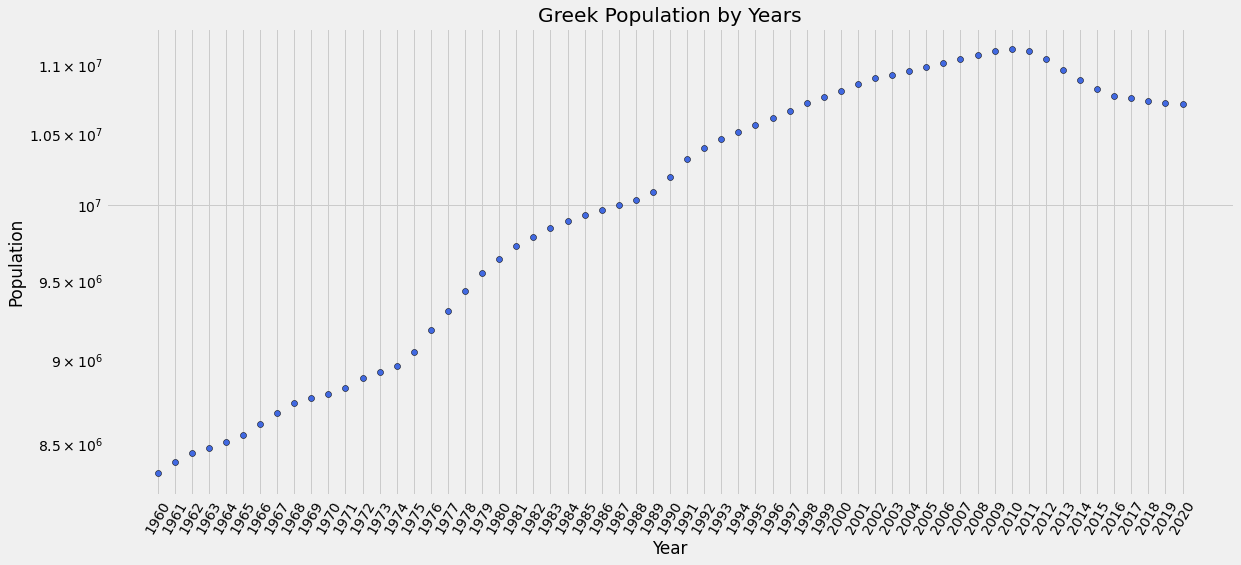

In [62]:
plt.figure(figsize=(18, 8))
plt.style.use("fivethirtyeight")
plt.scatter(x=gr_pop["year"], y=gr_pop["population"], color="royalblue", edgecolor="black")
plt.xticks(ticks=gr_pop["year"], rotation=60)
plt.yscale("log")
plt.title("Greek Population by Years")
plt.xlabel("Year")
plt.ylabel("Population")

- Getting the slope and intercept of the fitted regression line
- $ y = slope * x + intercept $

In [55]:
linreg = scipy.stats.linregress(x=gr_pop["year"], y=gr_pop["population"])
slope, intercept = linreg[0], linreg[1]

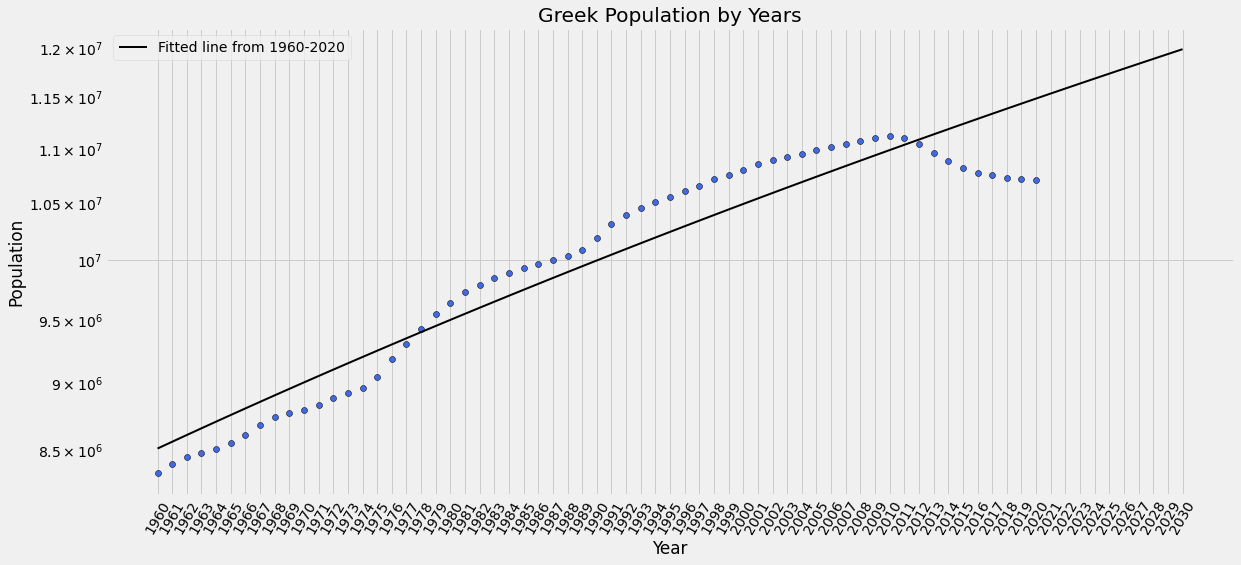

In [66]:
years = [year for year in range(1960, 2031)]
plt.figure(figsize=(18, 8))
plt.style.use("fivethirtyeight")
plt.scatter(x=gr_pop["year"], y=gr_pop["population"], color="royalblue", edgecolor="black")
plt.plot(years, [slope * x + intercept for x in years], color="black", linewidth=2, label="Fitted line from 1960-2020")
plt.xticks(ticks=years, rotation=60)
plt.yscale("log")
plt.title("Greek Population by Years")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()

- Calculating a fitted regresion line from 1980-2020

In [58]:
linreg = scipy.stats.linregress(x=gr_pop["year"][20:], y=gr_pop["population"][20:])
slope2, intercept2 = linreg[0], linreg[1]

- 10-year prediction

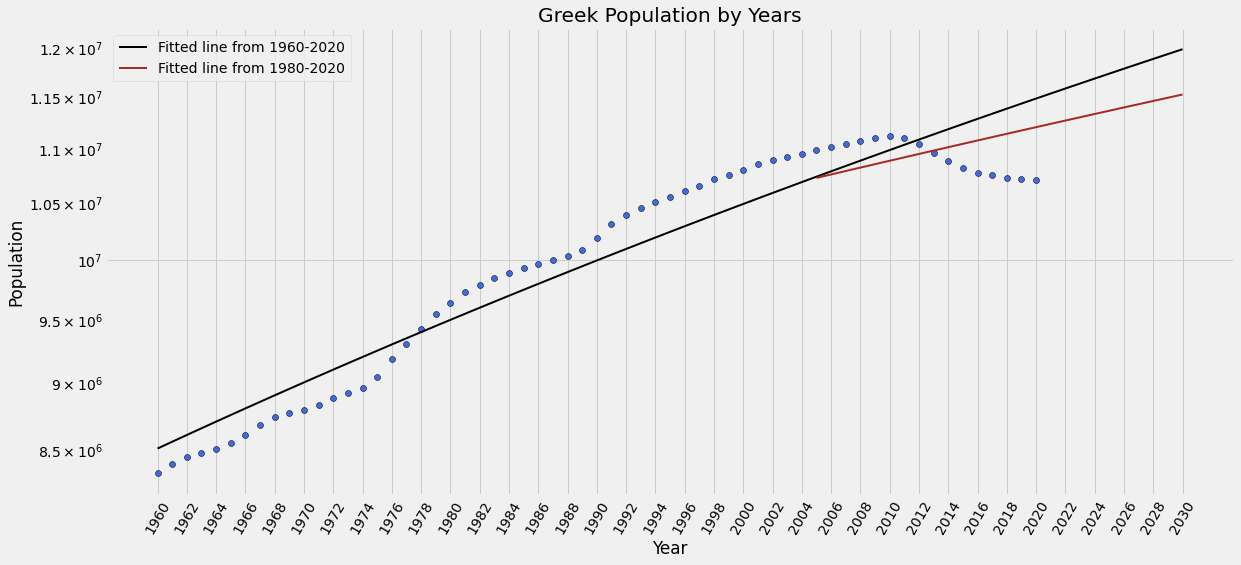

In [75]:
years = [year for year in range(1960, 2031)]
plt.figure(figsize=(18, 8))
plt.style.use("fivethirtyeight")
plt.scatter(x=gr_pop["year"], y=gr_pop["population"], color="royalblue", edgecolor="black")
plt.plot(years, [slope * x + intercept for x in years], color="black", linewidth=2, label="Fitted line from 1960-2020")
plt.plot(years[45:], [slope2 * x + intercept2 for x in years[45:]], color="brown", linewidth=2, label="Fitted line from 1980-2020")
plt.xticks(ticks=years[::2], labels=years[::2], rotation=60)
plt.yscale("log")
plt.title("Greek Population by Years")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()

- 20-year prediction

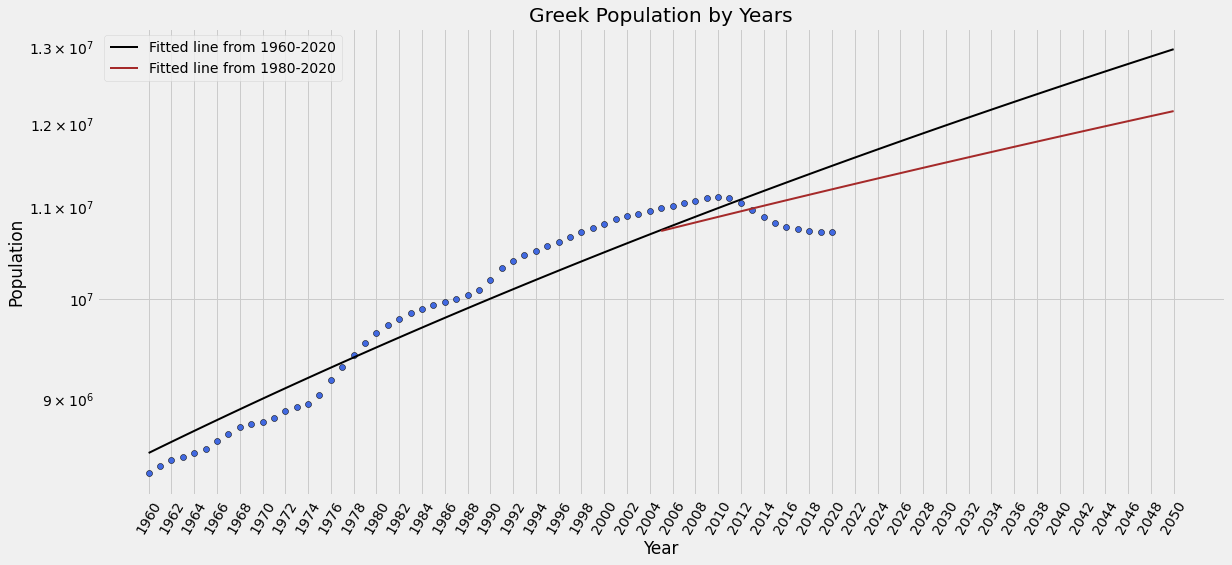

In [72]:
years = [year for year in range(1960, 2051)]
plt.figure(figsize=(18, 8))
plt.style.use("fivethirtyeight")
plt.scatter(x=gr_pop["year"], y=gr_pop["population"], color="royalblue", edgecolor="black")
plt.plot(years, [slope * x + intercept for x in years], color="black", linewidth=2, label="Fitted line from 1960-2020")
plt.plot(years[45:], [slope2 * x + intercept2 for x in years[45:]], color="brown", linewidth=2, label="Fitted line from 1980-2020")
plt.xticks(ticks=years[::2], labels=years[::2], rotation=60)
plt.yscale("log")
plt.title("Greek Population by Years")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()